# 1) Chicago Car Crash Project

### Introduction

### Business Problem Statement

### Objectives

### Experimental Design Taken

### 2) Load the Dataset

In [2]:
#!pip install scikit-learn==0.23.2

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler

from sklearn.compose import ColumnTransformer

#!pip install shap
import shap 
shap.initjs()

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC

import folium 

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\__init__.py)

In [3]:
#load the dataset
crashes = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Crashes.csv", low_memory= False)
people = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_People.csv",low_memory = False)
vehicles = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Vehicles.csv", low_memory = False)

In [4]:
# Merge the datsets
# Merge the datasets
merged_data = pd.merge(crashes, vehicles, on="CRASH_RECORD_ID", how="inner")
merged_data = pd.merge(merged_data, people, on="CRASH_RECORD_ID", how="inner")
merged_data.head()


,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


### 2.1) Providing the description of the dataset: Shape, Statistics and more additional info about the merged datasets

In [6]:
#Function to give the shape/general description of the dataset
def describe_merged_dataset(merged_data):
    # Shape of the dataset
    shape = merged_data.shape
    print("Shape of the dataset:", shape)

    statistics = merged_data.describe()
    print("\nBasic Statistics:")
    print(statistics)
    
    # Additional information
    print("\nAdditional Information:")
    merged_data.info()

# In this case for the merged datasets we are provided with the following information
describe_merged_dataset(merged_data)
merged_data

Shape of the dataset: (3324249, 149)

Basic Statistics:
       POSTED_SPEED_LIMIT      LANE_CNT     STREET_NO  BEAT_OF_OCCURRENCE  \
count        3.324249e+06  9.306350e+05  3.324249e+06        3.324225e+06   
mean         2.892263e+01  9.342349e+00  3.638574e+03        1.232284e+03   
std          5.716456e+00  2.109722e+03  2.870519e+03        7.019735e+02   
min          0.000000e+00  0.000000e+00  0.000000e+00        1.110000e+02   
25%          3.000000e+01  2.000000e+00  1.201000e+03        7.130000e+02   
50%          3.000000e+01  2.000000e+00  3.160000e+03        1.134000e+03   
75%          3.000000e+01  4.000000e+00  5.529000e+03        1.814000e+03   
max          9.900000e+01  1.191625e+06  4.511000e+05        6.100000e+03   

          NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count  3.324249e+06    3.324249e+06    3.324249e+06             3.324249e+06   
mean   2.198258e+00    3.069602e-01    1.938784e-03             3.134904e-02   
std    6.5

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,NaN,NONE,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3324245,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324246,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3324247,2d53e3705a5b2f13c9684cdc99c3ab976c88a9e1ae7239...,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,NaN,OTHER,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [7]:
# Identifying the columns and the data types in the merged datasets
def describe_columns(merged_data):
    # Columns and their data types
    columns = merged_data.columns
    data_types = merged_data.dtypes
    
    # Create a DataFrame to store the information
    column_info = pd.DataFrame({'Column Name': columns, 'Data Type': data_types})
    
    # Print the column information
    print(column_info)

describe_columns(merged_data)

                             Column Name Data Type
CRASH_RECORD_ID          CRASH_RECORD_ID    object
RD_NO_x                          RD_NO_x    object
CRASH_DATE_EST_I        CRASH_DATE_EST_I    object
CRASH_DATE_x                CRASH_DATE_x    object
POSTED_SPEED_LIMIT    POSTED_SPEED_LIMIT     int64
...                                  ...       ...
PEDPEDAL_VISIBILITY  PEDPEDAL_VISIBILITY    object
PEDPEDAL_LOCATION      PEDPEDAL_LOCATION    object
BAC_RESULT                    BAC_RESULT    object
BAC_RESULT VALUE        BAC_RESULT VALUE   float64
CELL_PHONE_USE            CELL_PHONE_USE    object

[149 rows x 2 columns]


### 2.1.1) Data Cleaning

#### Calculating for the missing values 
- Show the number of missing values 
- The percentage of missing values for each column in the dataset.
-Drop the missing values with a threshold of >95%

In [8]:
def calculate_missing_values(merged_data):
    # Count the missing values in each column
    missing_values = merged_data.isnull().sum()

    # Calculate the percentage of missing values for each column
    missing_percentage = (missing_values / len(merged_data)) * 100

    # Create a DataFrame to store the missing values and percentages
    missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values, 'Missing Percentage': missing_percentage.values})

    return missing_data

# Calculate the missing values
missing_data = calculate_missing_values(merged_data)

# Print the missing data
print(missing_data)

# Drop columns with a missing value percentage above the threshold
threshold = 95  # Set the threshold to 95%
columns_to_drop = missing_data[missing_data['Missing Percentage'] > threshold]['Column']
merged_data.drop(columns_to_drop, axis=1, inplace=True)


                  Column  Missing Values  Missing Percentage
0        CRASH_RECORD_ID               0            0.000000
1                RD_NO_x           22061            0.663639
2       CRASH_DATE_EST_I         3136129           94.340977
3           CRASH_DATE_x               0            0.000000
4     POSTED_SPEED_LIMIT               0            0.000000
..                   ...             ...                 ...
144  PEDPEDAL_VISIBILITY         3261203           98.103451
145    PEDPEDAL_LOCATION         3261073           98.099541
146           BAC_RESULT          682896           20.542865
147     BAC_RESULT VALUE         3319853           99.867760
148       CELL_PHONE_USE         3321763           99.925216

[149 rows x 3 columns]


In [9]:
merged_data

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,SAFETY BELT USED,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,IMPROPER TURN,UNKNOWN,NORMAL,TEST NOT OFFERED
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,REFUSED,NaN,NONE,NOT OBSCURED,NORMAL,TEST NOT OFFERED
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,SAFETY BELT USED,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,IMPROPER TURN,UNKNOWN,NORMAL,TEST NOT OFFERED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,57,NONE,UNKNOWN,NORMAL,TEST NOT OFFERED
3324245,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,SAFETY BELT USED,"DEPLOYED, FRONT",NONE,NO INDICATION OF INJURY,REFUSED,CFD,NaN,NaN,NaN,NaN
3324246,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONE,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,CFD,NaN,NaN,NaN,NaN
3324247,2d53e3705a5b2f13c9684cdc99c3ab976c88a9e1ae7239...,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,NONE PRESENT,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,OTHER,NOT OBSCURED,NORMAL,TEST NOT OFFERED


- The columns that exceed 95% of the threshold have been dropped hence the updated dataset

In [10]:
columns_to_drop = ['LANE_CNT', 'STREET_NO', 'NUM_UNITS', 'UNIT_NO', 'NUM_PASSENGERS', 'VEHICLE_ID_x', 'VEHICLE_YEAR', 'OCCUPANT_CNT', 'VEHICLE_ID_y', 'SEAT_NO']
merged_data.drop(columns_to_drop, axis=1, inplace=True)

In [11]:
columns_to_drop = ['INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DATE_POLICE_NOTIFIED', 'STREET_DIRECTION', 'STREET_NAME','MOST_SEVERE_INJURY', 'RD_NO_y', 'CRASH_DATE_y', 'UNIT_TYPE','MAKE','MAKE','LIC_PLATE_STATE','TRAVEL_DIRECTION', 'MANEUVER',
 'TOWED_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_11_I',
 'AREA_12_I',
 'AREA_99_I',
 'FIRST_CONTACT_POINT', 'PERSON_ID',
 'PERSON_TYPE',
 'RD_NO',
 'CITY',
 'STATE',
 'ZIPCODE', 'SEX',
 'DRIVERS_LICENSE_STATE',
 'DRIVERS_LICENSE_CLASS']
merged_data.drop(columns_to_drop, axis=1, inplace=True)

# Description of the new merged dataset

### Identifying the columns and data types

In [12]:
# Identifying the columns and the data types in the merged datasets
def describe_columns(merged_data):
    # Columns and their data types
    columns = merged_data.columns
    data_types = merged_data.dtypes
    
    # Create a DataFrame to store the information
    column_info = pd.DataFrame({'Column Name': columns, 'Data Type': data_types})
    
    # Print the column information
    print(column_info)

describe_columns(merged_data)

                                                 Column Name Data Type
CRASH_RECORD_ID                              CRASH_RECORD_ID    object
RD_NO_x                                              RD_NO_x    object
CRASH_DATE_EST_I                            CRASH_DATE_EST_I    object
CRASH_DATE_x                                    CRASH_DATE_x    object
POSTED_SPEED_LIMIT                        POSTED_SPEED_LIMIT     int64
TRAFFIC_CONTROL_DEVICE                TRAFFIC_CONTROL_DEVICE    object
DEVICE_CONDITION                            DEVICE_CONDITION    object
WEATHER_CONDITION                          WEATHER_CONDITION    object
LIGHTING_CONDITION                        LIGHTING_CONDITION    object
FIRST_CRASH_TYPE                            FIRST_CRASH_TYPE    object
TRAFFICWAY_TYPE                              TRAFFICWAY_TYPE    object
ALIGNMENT                                          ALIGNMENT    object
ROADWAY_SURFACE_COND                    ROADWAY_SURFACE_COND    object
ROAD_D

### Proceed to drop the unnecessary columns as well. Majority of these will not be used main;y because we are focusing on the major key factor
- Also dropping this allows the data space to its adjacent buffer size and affect memory as well
- Another key factor is that modelling might be easier in terms of speed

In [13]:
#Drop the unnecessary column
merged_data.drop(['EJECTION', 'HOSPITAL','EMS_AGENCY','DRIVER_ACTION','BAC_RESULT'], axis=1, inplace=True)

In [14]:
merged_data

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,CRASH_DATE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NONE,PASSENGER,RIDESHARE SERVICE,03/25/2019 02:43:00 PM,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NONE,PASSENGER,RIDESHARE SERVICE,03/25/2019 02:43:00 PM,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NONE,PASSENGER,RIDESHARE SERVICE,03/25/2019 02:43:00 PM,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NONE,PASSENGER,PERSONAL,03/25/2019 02:43:00 PM,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NONE,PASSENGER,PERSONAL,03/25/2019 02:43:00 PM,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,NONE,PASSENGER,PERSONAL,05/13/2023 03:14:00 AM,24.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,UNKNOWN,NORMAL
3324245,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,NONE,PASSENGER,PERSONAL,05/13/2023 03:14:00 AM,25.0,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,NaN,NaN
3324246,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,NONE,PASSENGER,PERSONAL,05/13/2023 03:14:00 AM,26.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,NaN,NaN
3324247,2d53e3705a5b2f13c9684cdc99c3ab976c88a9e1ae7239...,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,NONE,BUS UP TO 15 PASS.,OTHER,05/13/2023 03:21:00 PM,69.0,NONE PRESENT,NOT APPLICABLE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL


In [15]:
# Identify if there are more missing values 
merged_data.isnull().sum()

CRASH_RECORD_ID                        0
RD_NO_x                            22061
CRASH_DATE_EST_I                 3136129
CRASH_DATE_x                           0
POSTED_SPEED_LIMIT                     0
TRAFFIC_CONTROL_DEVICE                 0
DEVICE_CONDITION                       0
WEATHER_CONDITION                      0
LIGHTING_CONDITION                     0
FIRST_CRASH_TYPE                       0
TRAFFICWAY_TYPE                        0
ALIGNMENT                              0
ROADWAY_SURFACE_COND                   0
ROAD_DEFECT                            0
REPORT_TYPE                       129239
CRASH_TYPE                             0
DAMAGE                                 0
PRIM_CONTRIBUTORY_CAUSE                0
SEC_CONTRIBUTORY_CAUSE                 0
BEAT_OF_OCCURRENCE                    24
INJURIES_TOTAL                         0
INJURIES_FATAL                         0
INJURIES_INCAPACITATING                0
INJURIES_NON_INCAPACITATING            0
INJURIES_REPORTE

In [16]:
# Covert the crash date to date time
merged_data['datetime'] = pd.to_datetime(merged_data['CRASH_DATE'])

In [17]:
# Convert crash month, crash day of week, crash hour to  month, day and hour 
merged_data['CRASH_MONTH'] = merged_data['datetime'].dt.month
merged_data['CRASH_DAY_OF_WEEK'] = merged_data['datetime'].dt.day
merged_data['CRASH_HOUR'] = merged_data['datetime'].dt.hour

In [18]:
#Drop the unnecessary columns
merged_data.drop(['LOCATION', 'datetime', 'CRASH_DATE', 'CRASH_RECORD_ID','LATITUDE', 'LONGITUDE',], axis=1, inplace=True)

In [19]:
merged_data

,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,MODEL,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,CRUZE,NONE,PASSENGER,RIDESHARE SERVICE,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,CRUZE,NONE,PASSENGER,RIDESHARE SERVICE,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,CRUZE,NONE,PASSENGER,RIDESHARE SERVICE,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,CAMRY,NONE,PASSENGER,PERSONAL,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,CAMRY,NONE,PASSENGER,PERSONAL,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,SPORTAGE,NONE,PASSENGER,PERSONAL,24.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,UNKNOWN,NORMAL
3324245,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,SPORTAGE,NONE,PASSENGER,PERSONAL,25.0,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,NaN,NaN
3324246,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,SPORTAGE,NONE,PASSENGER,PERSONAL,26.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,NaN,NaN
3324247,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,ECONOLINE E450,NONE,BUS UP TO 15 PASS.,OTHER,69.0,NONE PRESENT,NOT APPLICABLE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL


### One hot Encoding for first_crash_type

In [20]:
# To know which columns to perform one hot encoding , we need to identify categorical columns
def get_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

# Example usage
categorical_cols = get_categorical_columns(merged_data)
categorical_cols


['RD_NO_x',
 'CRASH_DATE_EST_I',
 'CRASH_DATE_x',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'MODEL',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'INJURY_CLASSIFICATION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION']

### Inspecting the values in each column 



In [21]:
for col in merged_data.columns:
    try:
        print(col, merged_data[col].value_counts(dropna=False)[:10])
    except:
        print(col, merged_data[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

RD_NO_x NaN         22061
JC461568      192
JD200579      156
JD258344      154
JF485483      153
JG129804      144
JF346755      144
JB253311      138
JA522872      130
JB187770      122
Name: RD_NO_x, dtype: int64


CRASH_DATE_EST_I NaN    3136129
Y       160632
N        27488
Name: CRASH_DATE_EST_I, dtype: int64


CRASH_DATE_x 10/05/2019 10:08:00 PM    192
11/23/2022 05:00:00 PM    161
04/02/2020 05:44:00 PM    156
06/09/2020 05:30:00 AM    156
12/29/2020 05:00:00 PM    146
01/26/2023 06:35:00 AM    144
08/06/2022 02:48:00 PM    144
05/07/2018 09:35:00 AM    144
11/10/2017 10:30:00 AM    138
11/23/2017 04:14:00 PM    130
Name: CRASH_DATE_x, dtype: int64


POSTED_SPEED_LIMIT 30    2534235
35     239385
25     184564
20     111026
15      86243
10      54586
40      38850
0       28409
45      24898
5       14815
Name: POSTED_SPEED_LIMIT, dtype: int64


TRAFFIC_CONTROL_DEVICE NO CONTROLS               1685572
TRAFFIC SIGNAL            1101201
STOP SIGN/FLASHER          376111
UNKNOWN 

## We need to create bins for the following columns crash hour, age , post speed and time 

## Creating bins for crash_hour

In [22]:
# observing values of crash_hour
merged_data.CRASH_HOUR.value_counts()

16    272444
15    270763
17    264997
14    228866
18    217542
13    204474
12    192432
8     171863
11    163576
19    157157
9     142451
10    142229
7     138710
20    123379
21    111666
22    100950
23     84322
0      66032
6      63494
1      55681
2      46586
5      37494
3      36051
4      31090
Name: CRASH_HOUR, dtype: int64

## Creating bins for age 

In [23]:
merged_data.AGE.value_counts()

 25.0     67156
 27.0     66867
 26.0     66667
 28.0     65257
 24.0     64906
          ...  
-47.0         4
-177.0        4
-49.0         2
 106.0        2
-40.0         2
Name: AGE, Length: 116, dtype: int64

In [24]:
# creating bins and labels, preview data
merged_data['age_bins'] = pd.cut(x=merged_data['AGE'], bins = [0,15,24,35,55,100], 
                         labels = ['16 - Under-aged', '17-24', 
                        '25-30', '34-57','58+'])
merged_data.head()

,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,age_bins
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,NONE,PASSENGER,RIDESHARE SERVICE,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,NONE,PASSENGER,RIDESHARE SERVICE,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,NONE,PASSENGER,RIDESHARE SERVICE,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,NONE,PASSENGER,PERSONAL,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,NONE,PASSENGER,PERSONAL,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24


# Creating bins for time 

In [25]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
merged_data['time_bins'] = pd.cut(x=merged_data['CRASH_HOUR'], bins = [0,6,12,18,23], labels = ['Late Night/Early Morning','Morning', 'Afternoon/Rush Hour','Late Evening'])
merged_data.head()

,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,VEHICLE_TYPE,VEHICLE_USE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,age_bins,time_bins
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PASSENGER,RIDESHARE SERVICE,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PASSENGER,RIDESHARE SERVICE,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PASSENGER,RIDESHARE SERVICE,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PASSENGER,PERSONAL,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PASSENGER,PERSONAL,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour


### Create post_speed_limit bins

In [26]:
merged_data.POSTED_SPEED_LIMIT.value_counts()

30    2534235
35     239385
25     184564
20     111026
15      86243
10      54586
40      38850
0       28409
45      24898
5       14815
55       3517
50        861
3         763
9         396
39        347
99        291
60        219
1         121
24        118
2          80
65         78
32         72
33         62
34         54
11         40
36         30
6          26
7          22
26         22
14         16
31         14
29         11
22         10
12          9
70          9
8           8
23          8
38          8
4           7
18          6
44          6
63          4
62          2
49          1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [27]:
# we create the bins and label for better preview
# creating bins and label, previewing data 
merged_data['post_speed'] = pd.cut(x=merged_data['POSTED_SPEED_LIMIT'], bins = [0,15,25,40,75], labels = ['0-15', '16-25', '26-40', '41+'])
merged_data.head()

,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,VEHICLE_USE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,age_bins,time_bins,post_speed
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,RIDESHARE SERVICE,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,RIDESHARE SERVICE,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,RIDESHARE SERVICE,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour,26-40
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PERSONAL,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,PERSONAL,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40


In [28]:
contributory_causes = merged_data['PRIM_CONTRIBUTORY_CAUSE'].unique()
print(contributory_causes)


['IMPROPER TURNING/NO SIGNAL'
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
 'UNABLE TO DETERMINE' 'NOT APPLICABLE' 'IMPROPER LANE USAGE' 'WEATHER'
 'DISREGARDING TRAFFIC SIGNALS' 'FAILING TO YIELD RIGHT-OF-WAY'
 'FOLLOWING TOO CLOSELY'
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'
 'TURNING RIGHT ON RED' 'IMPROPER BACKING'
 'CELL PHONE USE OTHER THAN TEXTING'
 'FAILING TO REDUCE SPEED TO AVOID CRASH' 'IMPROPER OVERTAKING/PASSING'
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE' 'EQUIPMENT - VEHICLE CONDITION'
 'DISTRACTION - FROM INSIDE VEHICLE' 'DISTRACTION - FROM OUTSIDE VEHICLE'
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'
 'DISREGARDING ROAD MARKINGS' 'DISREGARDING STOP SIGN'
 'DISREGARDING OTHER TRAFFIC SIGNS' 'EXCEEDING AUTHORIZED SPEED LIMIT'
 'PHYSICAL CONDITION OF DRIVER' 'RELATED TO BUS STOP'
 'DRIVING ON WRONG SIDE/WRONG WAY' 'ROAD CONSTRUCTION/MAINTENANCE'
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS' 'ANIMAL'
 '

In [29]:
unique_values = merged_data['PRIM_CONTRIBUTORY_CAUSE'].unique()

In [30]:
# Define the mapping dictionary
mapping_dict = {
    'Driver Inattention/Distraction': 'Inattention/Distraction',
    'Failure to Yield Right-of-Way': 'Failure to Yield',
    'Other': 'Other',
    # Add more mappings as needed
}

# Apply the mapping
merged_data['Contributory_Cause_Bins'] = merged_data['PRIM_CONTRIBUTORY_CAUSE'].map(mapping_dict)


In [31]:
merged_data['PRIM_CONTRIBUTORY_CAUSE'] = pd.to_numeric(merged_data['PRIM_CONTRIBUTORY_CAUSE'], errors='coerce')
bins = [0, 3, 6, 9, 12]
labels = ['Low', 'Medium', 'High', 'Very High']
merged_data['Contributory_Cause_Bins'] = pd.cut(merged_data['PRIM_CONTRIBUTORY_CAUSE'], bins=bins, labels=labels)
merged_data

,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,age_bins,time_bins,post_speed,Contributory_Cause_Bins
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40,NaN
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40,NaN
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour,26-40,NaN
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40,NaN
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,24.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,UNKNOWN,NORMAL,17-24,Late Night/Early Morning,26-40,NaN
3324245,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,25.0,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,NaN,NaN,25-30,Late Night/Early Morning,26-40,NaN
3324246,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,26.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,NaN,NaN,25-30,Late Night/Early Morning,26-40,NaN
3324247,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,69.0,NONE PRESENT,NOT APPLICABLE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour,26-40,NaN


In [32]:
# Perform some data cleaning in traffic-control_device
def clean_columns(dataframe, columns):
    cleaned_df = dataframe.copy()
    
    for column in columns:
        merged_data[column] = merged_data[column].str.strip().fillna('Unknown').str.upper()
    
    return cleaned_df

# Example usage
columns_to_clean = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE',
                    'ROAD_DEFECT',]

cleaned_data = clean_columns(merged_data, columns_to_clean)
merged_data


,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,age_bins,time_bins,post_speed,Contributory_Cause_Bins
0,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40,NaN
1,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40,NaN
2,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,56.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour,26-40,NaN
3,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,27.0,SAFETY BELT USED,DID NOT DEPLOY,NO INDICATION OF INJURY,NaN,NaN,25-30,Afternoon/Rush Hour,26-40,NaN
4,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,22.0,SAFETY BELT USED,DID NOT DEPLOY,"REPORTED, NOT EVIDENT",UNKNOWN,NORMAL,17-24,Afternoon/Rush Hour,26-40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,24.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,UNKNOWN,NORMAL,17-24,Late Night/Early Morning,26-40,NaN
3324245,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,25.0,SAFETY BELT USED,"DEPLOYED, FRONT",NO INDICATION OF INJURY,NaN,NaN,25-30,Late Night/Early Morning,26-40,NaN
3324246,NaN,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,26.0,SAFETY BELT USED,"DEPLOYED, COMBINATION",NONINCAPACITATING INJURY,NaN,NaN,25-30,Late Night/Early Morning,26-40,NaN
3324247,NaN,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,69.0,NONE PRESENT,NOT APPLICABLE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,58+,Afternoon/Rush Hour,26-40,NaN


## Clean both device control and traffic control device

In [33]:
# Define the mappings
traffic_control_map = {
    'NO CONTROLS': 'NO CONTROLS',
    'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
    'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
    'UNKNOWN': 'UNKNOWN/OTHER',
    'OTHER': 'UNKNOWN/OTHER',
    'YIELD': 'UNKNOWN/OTHER',
    'SCHOOL ZONE': 'UNKNOWN/OTHER'
}

device_map = {
    'NO CONTROLS': 'NO CONTROLS',
    'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
    'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
    'OTHER': 'NOT FUNCTIONING/UNKNOWN',
    'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
    'NOT FUNCTIONING': 'NOT FUNCTIONING/UNKNOWN'
}

# Apply the mappings using replace()
merged_data['TRAFFIC_CONTROL_DEVICE'] = merged_data['TRAFFIC_CONTROL_DEVICE'].replace(traffic_control_map)

print(merged_data['TRAFFIC_CONTROL_DEVICE'].value_counts())

print(merged_data['DEVICE_CONDITION'].value_counts())
merged_data['DEVICE_CONDITION'] = merged_data['DEVICE_CONDITION'].replace(device_map)

# Check the value counts after mapping




NO CONTROLS                 1685572
TRAFFIC SIGNAL/SIGN         1477312
UNKNOWN/OTHER                139158
LANE USE MARKING               6039
OTHER REG. SIGN                3300
OTHER WARNING SIGN             2470
RAILROAD CROSSING GATE         2427
PEDESTRIAN CROSSING SIGN       2156
DELINEATORS                    1455
FLASHING CONTROL SIGNAL        1414
POLICE/FLAGMAN                 1298
OTHER RAILROAD CROSSING         812
RR CROSSING SIGN                500
NO PASSING                      235
BICYCLE CROSSING SIGN           101
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64
NO CONTROLS                 1718621
FUNCTIONING PROPERLY        1351556
UNKNOWN                      197050
OTHER                         26369
FUNCTIONING IMPROPERLY        18354
NOT FUNCTIONING               10710
WORN REFLECTIVE MATERIAL       1171
MISSING                         418
Name: DEVICE_CONDITION, dtype: int64


## Clean weather condition

In [34]:
merged_data.WEATHER_CONDITION.value_counts()

# defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

merged_data.WEATHER_CONDITION = merged_data.WEATHER_CONDITION.map(weather_map)
merged_data.WEATHER_CONDITION.value_counts()

CLEAR                2644677
RAIN/CLOUDY/OTHER     535858
Name: WEATHER_CONDITION, dtype: int64

## Clean first_crash_type

In [35]:
merged_data.FIRST_CRASH_TYPE.value_counts()


# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}

merged_data.FIRST_CRASH_TYPE = merged_data.FIRST_CRASH_TYPE.map(crash_map)
merged_data.FIRST_CRASH_TYPE.value_counts()

TURNING/ANGLE    1006367
REAR END          944438
SIDESWIPE         573822
PARKED/FIXED      504545
PED/CYCLIST       124757
OTHER              78896
Name: FIRST_CRASH_TYPE, dtype: int64

In [36]:
merged_data.TRAFFICWAY_TYPE.value_counts()


# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}

merged_data.TRAFFICWAY_TYPE = merged_data.TRAFFICWAY_TYPE.map(traffic_map)
merged_data.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED    1490567
DIVIDED         809806
ONE-WAY         355509
FOUR WAY        226319
ALLEY/OTHER     200749
PARKING LOT     166778
UNKNOWN          46178
Name: TRAFFICWAY_TYPE, dtype: int64

In [37]:
merged_data.ROAD_DEFECT.value_counts()

# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}

merged_data.ROAD_DEFECT= merged_data.ROAD_DEFECT.map(defect_map)
merged_data.ROAD_DEFECT.value_counts()

NO DEFECTS       2740674
UNKNOWN/OTHER     553148
Name: ROAD_DEFECT, dtype: int64

In [38]:
merged_data.DRIVER_VISION.value_counts()

NOT OBSCURED              1364959
UNKNOWN                   1209245
OTHER                       25948
MOVING VEHICLES             15225
PARKED VEHICLES              9395
WINDSHIELD (WATER/ICE)       7339
BLINDED - SUNLIGHT           3110
TREES, PLANTS                1022
BUILDINGS                     882
BLINDED - HEADLIGHTS          248
HILLCREST                     184
BLOWING MATERIALS             176
EMBANKMENT                    161
SIGNBOARD                      68
Name: DRIVER_VISION, dtype: int64

In [39]:
# defining dictionary map and remapping
driver_map = {'NOT OBSCURED': 'NOT OBSCURED',
                'UNKNOWN': 'UNKNOWN',
                'OTHER': 'OBSCURED',
                'PARKED VEHICLES': 'OBSCURED',
                'MOVING VEHICLES': 'OBSCURED',
                'BLINDED - SUNLIGHT': 'OBSCURED'}

people.DRIVER_VISION = people.DRIVER_VISION.map(driver_map)
people.DRIVER_VISION.value_counts()

NOT OBSCURED    651566
UNKNOWN         579029
OBSCURED         26195
Name: DRIVER_VISION, dtype: int64

In [40]:
merged_data.SAFETY_EQUIPMENT.value_counts()

SAFETY BELT USED                              1592372
USAGE UNKNOWN                                 1535861
NONE PRESENT                                   106549
SAFETY BELT NOT USED                            18332
CHILD RESTRAINT USED                            16508
HELMET NOT USED                                 13668
CHILD RESTRAINT - FORWARD FACING                 7835
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)       5341
CHILD RESTRAINT - TYPE UNKNOWN                   4026
CHILD RESTRAINT - REAR FACING                    3713
HELMET USED                                      2727
BOOSTER SEAT                                     2039
DOT COMPLIANT MOTORCYCLE HELMET                  2026
CHILD RESTRAINT NOT USED                         1539
SHOULD/LAP BELT USED IMPROPERLY                   422
NOT DOT COMPLIANT MOTORCYCLE HELMET               372
WHEELCHAIR                                        362
CHILD RESTRAINT USED IMPROPERLY                   261
STRETCHER                   

In [41]:
merged_data.SAFETY_EQUIPMENT.value_counts()
# defining dictionary map and remapping
safety_map = {'USAGE UNKNOWN': 'USAGE UNKNOWN',
                'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                'NONE PRESENT': 'NONE PRESENT/USED',
                'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                'HELMET NOT USED': 'NONE PRESENT/USED',
                'SAFETY BELT NOT USED': 'NONE PRESENT/USED',
                'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/USED'}

merged_data.SAFETY_EQUIPMENT= merged_data.SAFETY_EQUIPMENT.map(safety_map)
merged_data.SAFETY_EQUIPMENT.value_counts()  

SAFETY EQUIPMENT USED    1613287
USAGE UNKNOWN            1535861
NONE PRESENT/USED         138971
Name: SAFETY_EQUIPMENT, dtype: int64

In [42]:
# creating classes: 0 = not injured, 1 = injured
merged_data['POSTED_SPEED_LIMIT'] = merged_data['POSTED_SPEED_LIMIT'].map(lambda x: 1 if x > 0 else 0)

In [43]:
# converting columns to appropriate data types 
merged_data['BEAT_OF_OCCURRENCE'] = merged_data['BEAT_OF_OCCURRENCE'].astype('str')
merged_data['CRASH_DAY_OF_WEEK'] = merged_data['CRASH_DAY_OF_WEEK'].astype('str')
merged_data['INJURIES_TOTAL'] = merged_data['INJURIES_TOTAL'].astype('str')

## Exploration of data and answering some of the business questions

### Which crash of the week had the highest injuries 

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

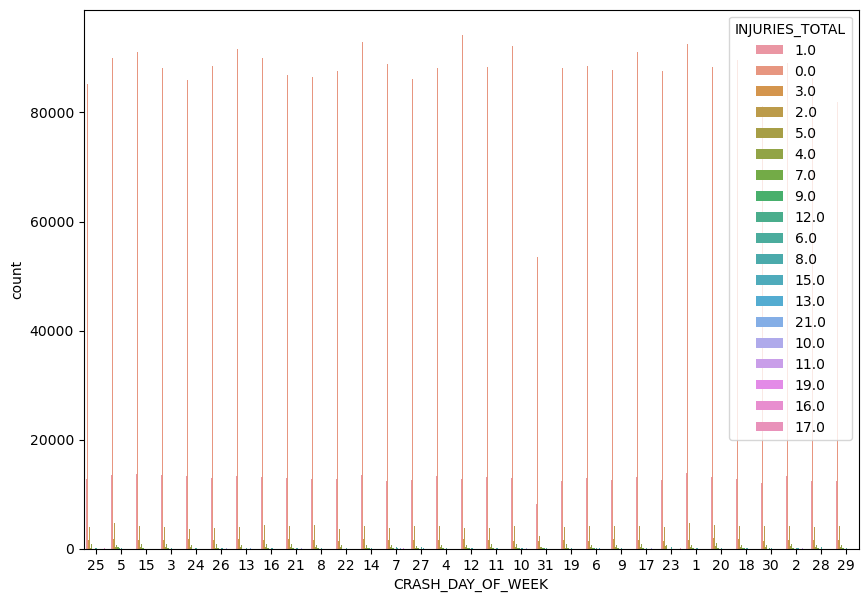

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(x="CRASH_DAY_OF_WEEK", hue="INJURIES_TOTAL", data=merged_data)

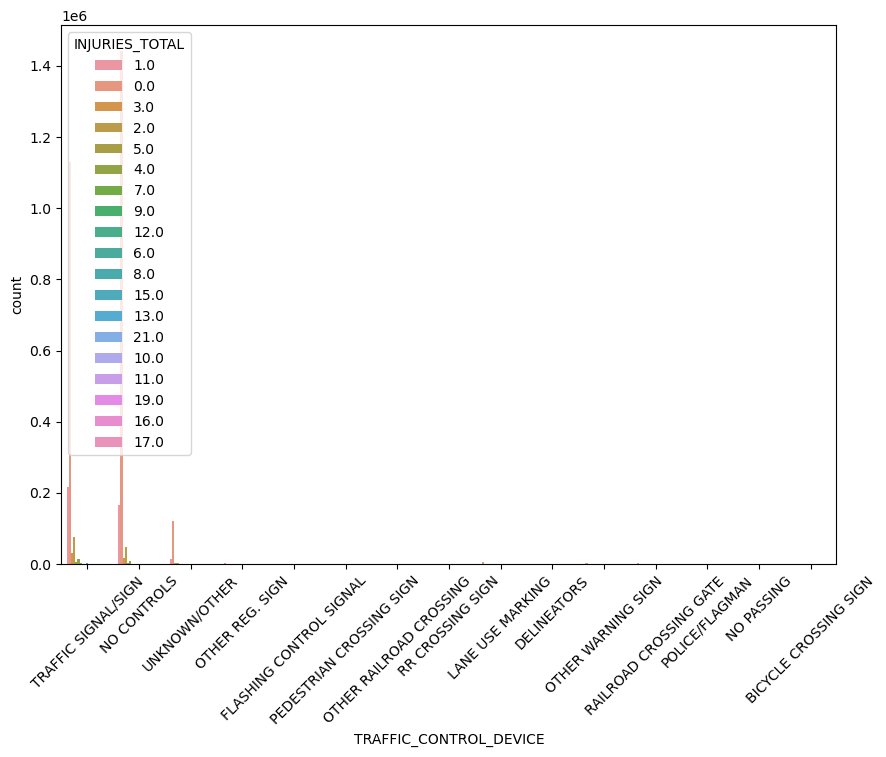

In [45]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="TRAFFIC_CONTROL_DEVICE", hue="INJURIES_TOTAL", data=merged_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


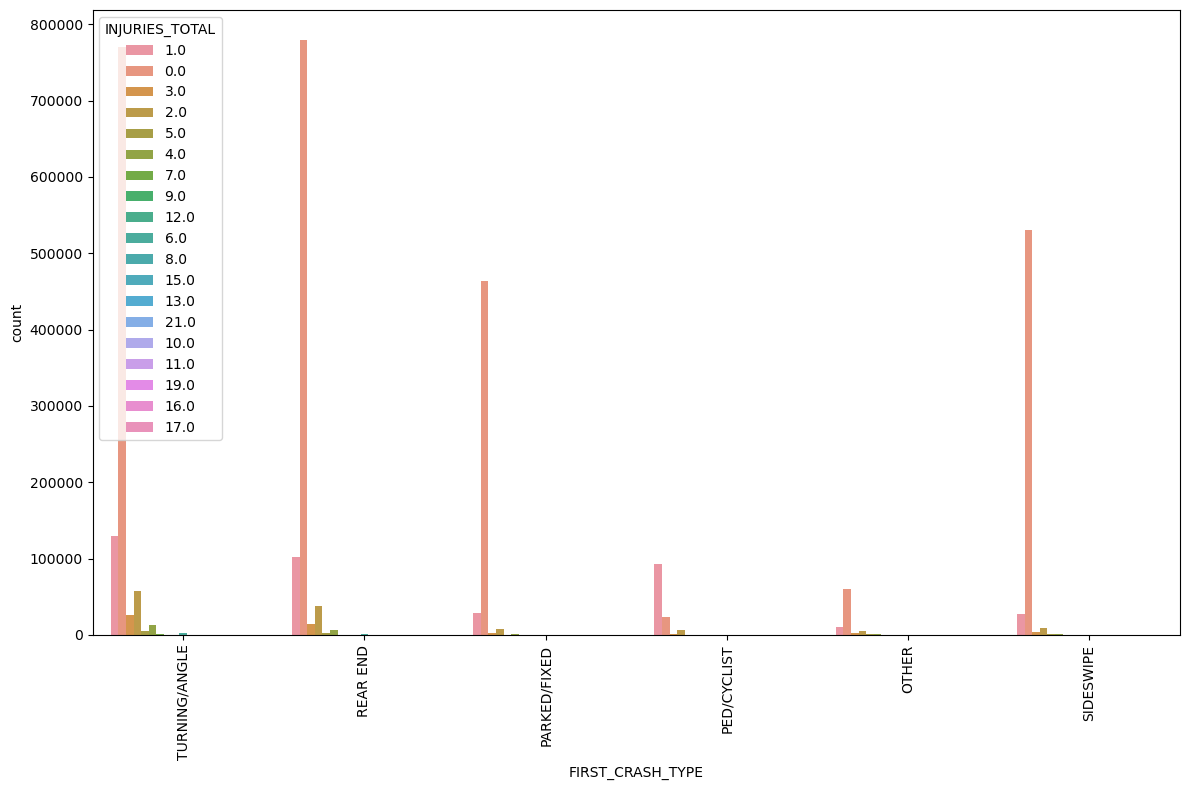

In [46]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="FIRST_CRASH_TYPE", hue="INJURIES_TOTAL", data=merged_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


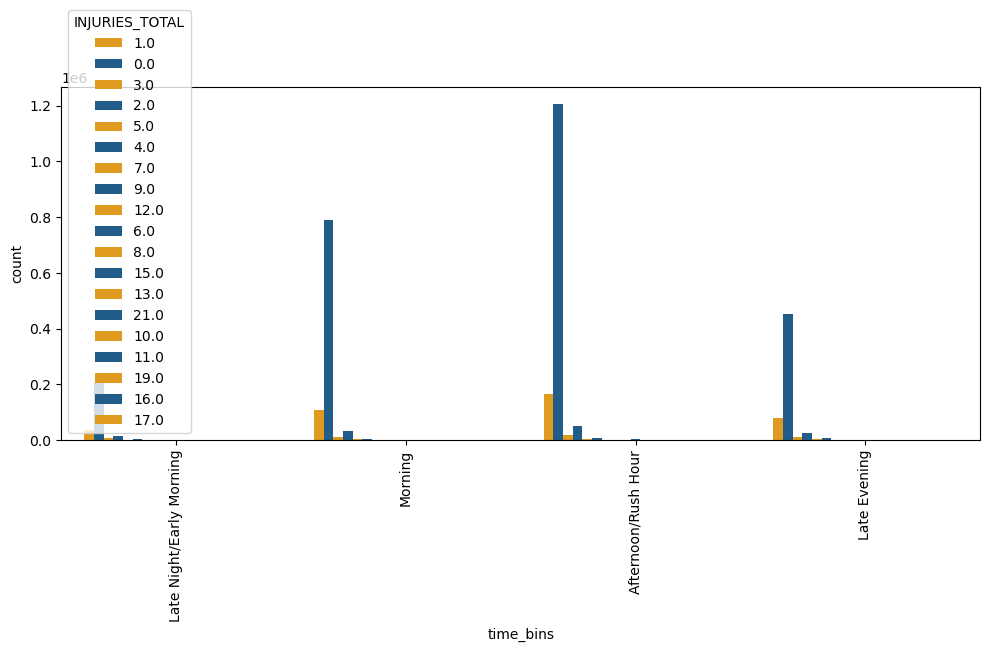

In [47]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="time_bins", hue="INJURIES_TOTAL", data=merged_data, palette = ["#ffa300", "#115f9a"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

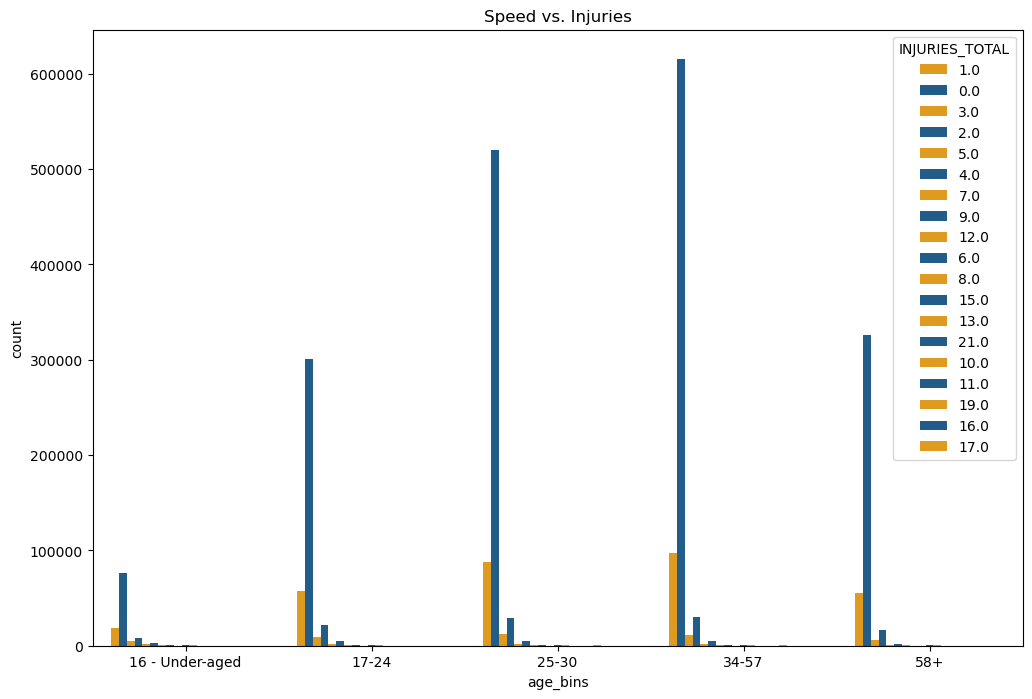

In [48]:
plt.figure(figsize=(12, 8))
sns.countplot(x="age_bins", hue="INJURIES_TOTAL", data=merged_data, palette=["#ffa300", "#115f9a"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
plt.title('Speed vs. Injuries')

plt.show()


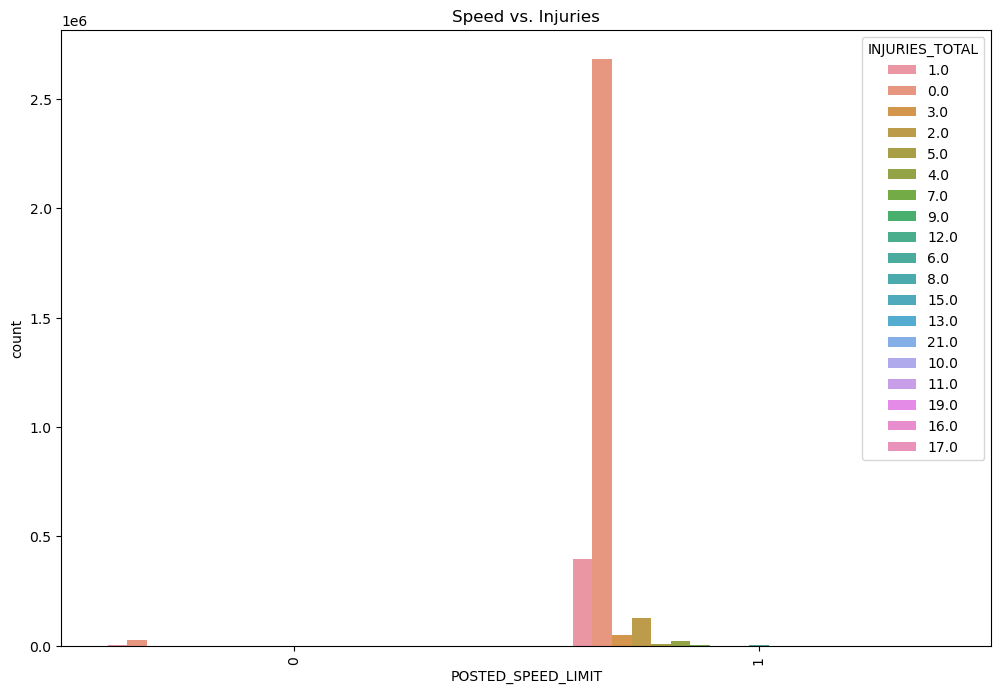

In [49]:
# Plot 1: Order Status vs. Review Score
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_data, x="POSTED_SPEED_LIMIT", hue = "INJURIES_TOTAL")
plt.title('Speed vs. Injuries')
plt.xticks(rotation=90)
plt.show()


### Split the data to training and testing 
 - Function : Data training and splitting

In [50]:
from sklearn.model_selection import train_test_split

def split_train_test_data(data, target, test_size=0.25, random_state=42):
    X = merged_data.drop(columns=target)
    y = merged_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Specify the target variable
target = 'PRIM_CONTRIBUTORY_CAUSE'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = split_train_test_data(merged_data, target)

In [51]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

# Load and merge the datasets
crashes = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Crashes.csv", low_memory=False)
people = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_People.csv", low_memory=False)
vehicles = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Vehicles.csv", low_memory=False)

# Merge the datasets
merged_data = pd.merge(crashes, vehicles, on="CRASH_RECORD_ID", how="inner")
merged_data = pd.merge(merged_data, people, on="CRASH_RECORD_ID", how="inner")

# Define the categorical columns
categorical_cols = ['RD_NO_x', 'CRASH_DATE_EST_I', 'CRASH_DATE_x', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                    'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
                    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE',
                    'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'INJURIES_TOTAL', 'CRASH_DAY_OF_WEEK',
                    'MODEL', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
                    'INJURY_CLASSIFICATION', 'DRIVER_VISION', 'PHYSICAL_CONDITION']

# Instantiate the FeatureHasher
hasher = FeatureHasher(n_features=10, input_type='string')

# Perform feature hashing on categorical variables
hashed_features = hasher.transform(merged_data[categorical_cols])

# Convert the hashed features to a DataFrame
hashed_features_df = pd.DataFrame(hashed_features.toarray())

# Concatenate the hashed features with the original dataframe
merged_data_hashed = pd.concat([merged_data.drop(columns=categorical_cols), hashed_features_df], axis=1)

# Print the resulting dataframe
print(merged_data_hashed.head())


                                     CRASH_RECORD_ID  POSTED_SPEED_LIMIT  \
0  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...                  30   
1  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...                  30   
2  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...                  30   
3  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...                  30   
4  79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...                  30   

   LANE_CNT INTERSECTION_RELATED_I NOT_RIGHT_OF_WAY_I HIT_AND_RUN_I  \
0       4.0                      Y                NaN           NaN   
1       4.0                      Y                NaN           NaN   
2       4.0                      Y                NaN           NaN   
3       4.0                      Y                NaN           NaN   
4       4.0                      Y                NaN           NaN   

     DATE_POLICE_NOTIFIED     PRIM_CONTRIBUTORY_CAUSE  STREET_NO  \
0  03/25/2019 03:17:00 PM  IMPROPER TURNING/NO S

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder,SimpleImputer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_data_hashed.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1),
                                                    merged_data_hashed['PRIM_CONTRIBUTORY_CAUSE'],
                                                    test_size=0.2,
                                                    random_state=42)


# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


# Instantiate and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the training data
y_train_pred = logreg.predict(X_train)

# Generate the classification report for the training data
classification_report_train = classification_report(y_train, y_train_pred)

# Print the classification report
print('------------------------------------------------------------')
print('Logistic Regression CLASSIFICATION REPORT TRAINING')
print('------------------------------------------------------------')
print(classification_report_train)


ImportError: cannot import name 'SimpleImputer' from 'sklearn.preprocessing' (c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\__init__.py)

### Preprocessing numerical and categorical columns 

### - Numerical Columns

In [ ]:
# retrieving list of numeric columns 
numerical_cols = merged_data.drop(columns=target).select_dtypes('number').columns.tolist()
numerical_cols

['POSTED_SPEED_LIMIT',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_MONTH',
 'CRASH_UNIT_ID',
 'AGE']

### - Categorical Columns 

In [ ]:
categorical_cols = merged_data.drop(columns=target).select_dtypes('object').columns.tolist()
categorical_cols

['RD_NO_x',
 'CRASH_DATE_EST_I',
 'CRASH_DATE_x',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'DAMAGE',
 'SEC_CONTRIBUTORY_CAUSE',
 'BEAT_OF_OCCURRENCE',
 'INJURIES_TOTAL',
 'CRASH_DAY_OF_WEEK',
 'MODEL',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'INJURY_CLASSIFICATION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION']

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Select the relevant columns
numerical_cols = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'CRASH_MONTH', 'CRASH_UNIT_ID', 'AGE']
categorical_cols = ['RD_NO_x', 'CRASH_DATE_EST_I', 'CRASH_DATE_x', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                    'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
                    'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE',
                    'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'INJURIES_TOTAL', 'CRASH_DAY_OF_WEEK',
                    'MODEL', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
                    'INJURY_CLASSIFICATION', 'DRIVER_VISION', 'PHYSICAL_CONDITION']

# Split the data into X and y
X = merged_data[numerical_cols + categorical_cols]
y = merged_data['TARGET_VARIABLE']  # Replace 'TARGET_VARIABLE' with the actual target variable name

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical variables using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
X_test_imputed = imputer.transform(X_test[numerical_cols])

# Scale the numerical features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Concatenate the encoded categorical features with scaled numerical features
X_train_processed = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_train_encoded.toarray())], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_scaled), pd.DataFrame(X_test_encoded.toarray())], axis=1)

# Instantiate and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_processed, y_train)

# Instantiate and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_processed, y_train)

# Instantiate and train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)


ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (c:\Users\wanji\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\__init__.py)

In [ ]:
merged_data.dropna(subset=categorical_cols, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from mord import LogisticIT
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import accuracy_score

# Instantiate a logistic regression model with L1 regularization (Lasso)
lasso_regression = LogisticRegression(penalty='l1', solver='liblinear')
lasso_regression.fit(X_train[numerical_cols], y_train)

# Make predictions on the test set
lasso_predictions = lasso_regression.predict(X_test[numerical_cols])

# Evaluate the accuracy of each model
lasso_accuracy = accuracy_score(y_test, lasso_predictions)

print("Lasso Regression Accuracy:", lasso_accuracy)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, y_train, y_test = split_train_test_data(merged_data, target)


In [ ]:
encoded_X_train = pd.get_dummies(X_train, columns=categorical_cols)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_cols)


In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic')


In [ ]:
missing_rows = pd.isnull(y_train)

X_train_cleaned = encoded_X_train[~missing_rows]
y_train_cleaned = y_train[~missing_rows]


In [ ]:
import xgboost as xgb
import category_encoders as ce


In [ ]:
encoder = ce.OrdinalEncoder(cols=categorical_cols)
X_train_encoded = encoder.fit_transform(X_train_cleaned)

dtrain = xgb.DMatrix(X_train_encoded, label=y_train_cleaned, enable_categorical=True)



KeyError: 'RD_NO_x'

In [ ]:
xgb_model.fit(X_train_cleaned, y_train_cleaned)


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:age_bins: category, time_bins: category, post_speed: category, Contributory_Cause_Bins: category

In [ ]:
xgb_model.fit(encoded_X_train, y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [nan]

In [ ]:
predictions = xgb_model.predict(encoded_X_test)


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy:", accuracy)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X_train, X_test, y_train, y_test = split_train_test_data(merged_data, target)


MemoryError: Unable to allocate 609. MiB for an array with shape (24, 3324249) and data type float64

In [ ]:
encoded_X_train = pd.get_dummies(X_train, columns=categorical_cols)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_cols)


MemoryError: Unable to allocate 455. GiB for an array with shape (699226, 699226) and data type uint8

In [ ]:
# Identify rare categories and group them into a common category
def group_rare_categories(series, threshold=0.05, common_category='Other'):
    value_counts = series.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    series[series.isin(rare_categories)] = common_category
    return series

# Apply grouping to categorical columns
X_train_grouped = X_train.copy()
for col in categorical_cols:
    X_train_grouped[col] = group_rare_categories(X_train_grouped[col])

# Perform one-hot encoding on the grouped dataset
encoded_X_train_grouped = pd.get_dummies(X_train_grouped, columns=categorical_cols)


In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the numerical columns
encoded_X_train_imputed = imputer.fit_transform(X_train_numeric)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Encode categorical variables
encoded_X_train = encoder.fit_transform(X_train)

# Convert the encoded categorical variables to an array
encoded_X_train_categorical_array = encoded_X_train.toarray()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
knn_5.fit(encoded_X_train, y_train)
knn_10.fit(encoded_X_train, y_train)
knn_15.fit(encoded_X_train, y_train)


ValueError: could not convert string to float: 'JD468050'

In [ ]:
predictions_5 = knn_5.predict(encoded_X_test)
predictions_10 = knn_10.predict(encoded_X_test)
predictions_15 = knn_15.predict(encoded_X_test)


In [ ]:
accuracy_5 = accuracy_score(y_test, predictions_5)
accuracy_10 = accuracy_score(y_test, predictions_10)
accuracy_15 = accuracy_score(y_test, predictions_15)

print("KNN (K=5) Accuracy:", accuracy_5)
print("KNN (K=10) Accuracy:", accuracy_10)
print("KNN (K=15) Accuracy:", accuracy_15)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
X_train, X_test, y_train, y_test = split_train_test_data(merged_data, target)


In [ ]:
encoded_X_train = pd.get_dummies(X_train, columns=categorical_cols)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_cols)


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(base_estimator=tree_clf, random_state=42)


In [ ]:
tree_grid_search = GridSearchCV(tree_clf, param_grid, cv=5)
bag_grid_search = GridSearchCV(bag_clf, param_grid, cv=5)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the numerical columns
scaler = StandardScaler()
encoded_X_train_scaled = scaler.fit_transform(encoded_X_train[numerical_cols])



In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
encoded_X_train_imputed = imputer.fit_transform(encoded_X_train[numerical_cols])


In [ ]:
# Winsorization example
from scipy.stats import mstats

encoded_X_train_winsorized = mstats.winsorize(encoded_X_train_imputed, limits=[0.05, 0.05])


In [ ]:
encoded_X_train = pd.get_dummies(X_train, columns=categorical_cols)
encoded_X_test = pd.get_dummies(X_test, columns=categorical_cols)

In [ ]:
# Fit the model
tree_grid_search.fit(encoded_X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').